In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_data = pd.read_csv('cleaned_data.csv')
model_data

,price,rooms,area,build_year,condition,energy_mark,bedrooms,prepayment,floor,total_floors,...,has_internet,has_security_door,has_video_surveillance,has_storage,has_first_rent,has_deposit,has_commission,has_contract_fee,description_header_is_all_caps,description_header_length
0,750.0,2.0,42.1,1807.0,4.0,NaN,NaN,NaN,1.0,3.0,...,True,True,False,False,False,False,False,False,True,30.0
1,595.0,3.0,58.7,2005.0,3.0,NaN,2.0,NaN,3.0,5.0,...,True,True,False,False,True,True,True,False,False,40.0
2,670.0,2.0,72.0,NaN,4.0,NaN,1.0,NaN,4.0,4.0,...,True,True,False,True,False,False,False,False,False,0.0
3,550.0,1.0,24.0,2023.0,5.0,7.0,1.0,550.0,3.0,4.0,...,False,False,False,True,False,False,False,False,False,47.0
4,800.0,2.0,48.1,2020.0,3.0,NaN,1.0,NaN,1.0,4.0,...,False,False,False,False,True,True,False,True,True,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,540.0,2.0,41.9,2018.0,5.0,NaN,1.0,NaN,1.0,1.0,...,True,False,False,False,True,True,False,False,False,0.0
1866,790.0,2.0,45.8,2022.0,5.0,7.0,1.0,NaN,2.0,4.0,...,False,True,False,True,True,True,True,False,True,41.0
1867,459.0,1.0,21.0,2019.0,5.0,NaN,NaN,NaN,6.0,8.0,...,True,True,True,True,False,True,False,False,False,50.0
1868,500.0,1.0,32.9,1994.0,5.0,4.0,1.0,500.0,7.0,9.0,...,True,True,True,False,False,True,True,False,True,38.0


In [2]:
import seaborn as sns

model_data = pd.get_dummies(model_data, columns=['mun_or_city']) 
X = model_data.drop(columns=['price'])
y = model_data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

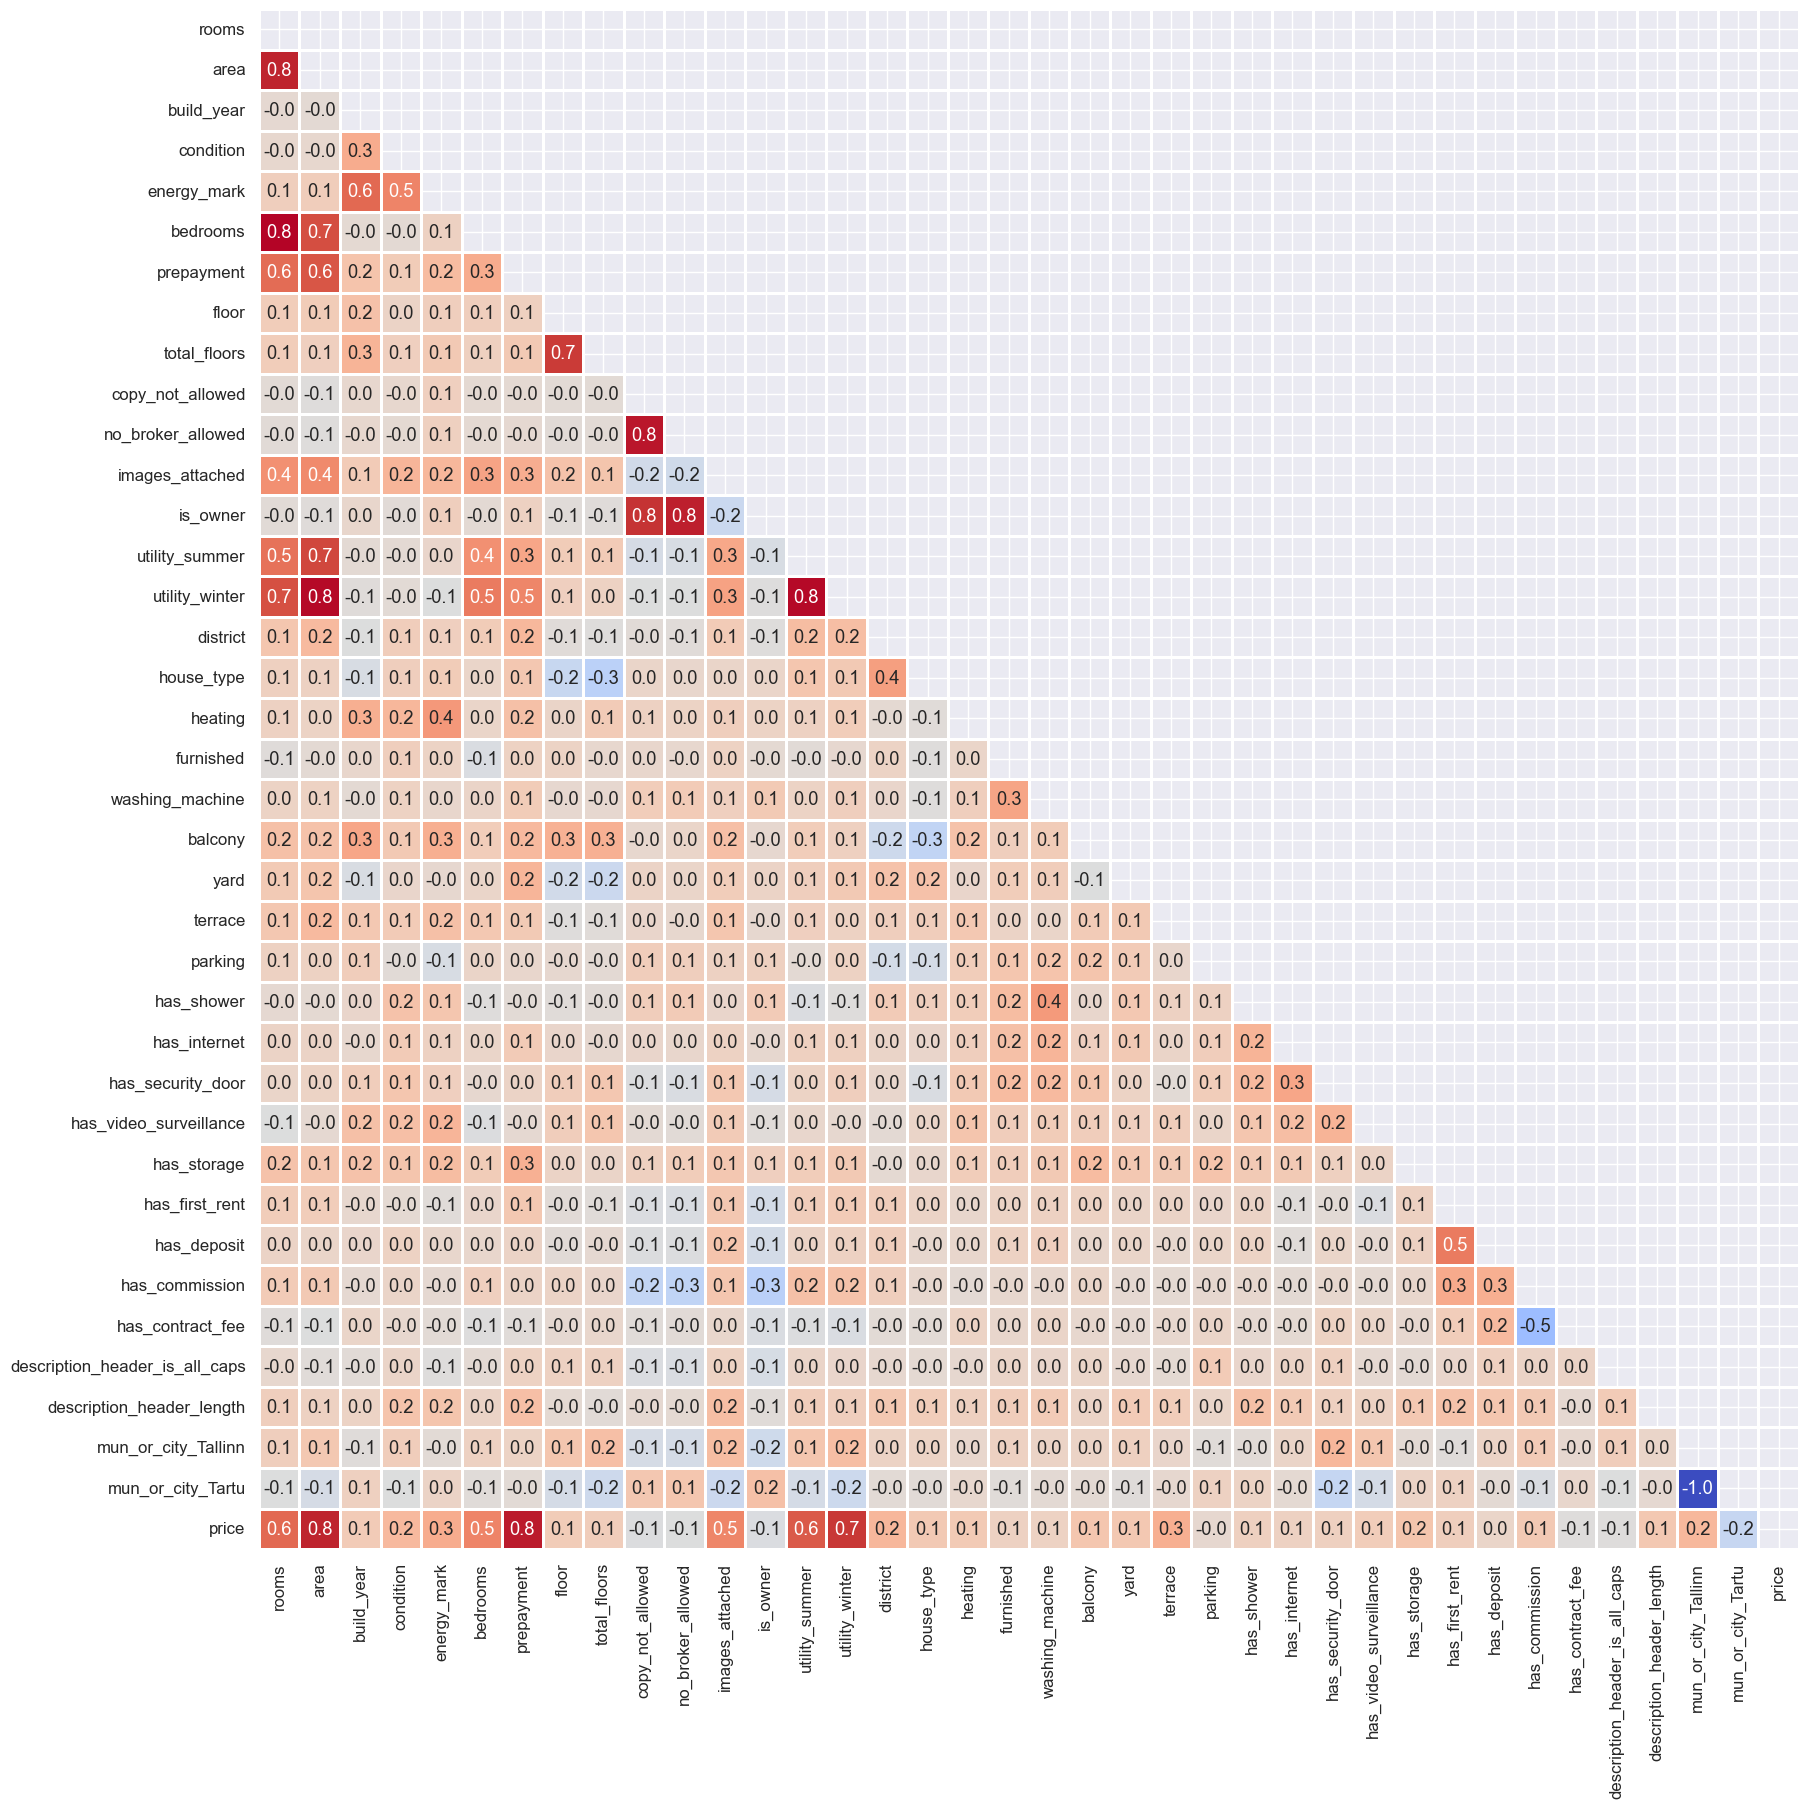

In [3]:
sns.set(font_scale=1.1)
columns = [col for col in model_data.columns if col != 'price'] + ['price']
model_data = model_data[columns]
correlation_train = model_data.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.savefig('corr_heatmap.pdf')

In [4]:
X_train.describe()

,rooms,area,build_year,condition,energy_mark,bedrooms,prepayment,floor,total_floors,images_attached,utility_summer,utility_winter,district,house_type,heating,description_header_length
count,1397.000000,1402.000000,1104.000000,1284.000000,709.000000,1003.000000,257.000000,1305.000000,1305.000000,1401.000000,464.000000,464.000000,1402.000000,1055.000000,1196.000000,1402.000000
mean,2.075161,50.924679,1983.473732,3.713396,5.595205,1.455633,529.267315,3.170881,5.165517,19.729479,92.452586,170.743534,3.487874,1.806635,7.169732,34.315264
std,0.890538,27.523834,45.653085,0.971347,1.547197,0.673697,182.740318,2.212779,3.051482,9.689998,49.285192,96.050568,1.611498,0.438379,1.646740,16.746006
min,1.000000,8.500000,1347.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,2.000000,17.000000,17.000000,1.000000,1.000000,2.000000,0.000000
25%,1.000000,33.000000,1961.750000,3.000000,4.000000,1.000000,400.000000,2.000000,3.000000,13.000000,60.000000,110.000000,2.000000,2.000000,7.000000,26.000000
50%,2.000000,46.900000,1989.000000,4.000000,6.000000,1.000000,500.000000,3.000000,5.000000,18.000000,80.000000,150.000000,4.000000,2.000000,7.000000,39.000000
75%,3.000000,61.600000,2018.000000,5.000000,7.000000,2.000000,650.000000,4.000000,6.000000,25.000000,110.000000,200.000000,5.000000,2.000000,9.000000,47.000000
max,6.000000,265.000000,2024.000000,5.000000,8.000000,5.000000,990.000000,24.000000,30.000000,68.000000,500.000000,1000.000000,5.000000,3.000000,11.000000,64.000000


In [5]:
# not a perfect solution, but let's fill all possible NaN-values with mean values (after splitting, of course!)
columns = ['rooms', 'build_year', 'condition', 'energy_mark', 'bedrooms', 'prepayment', 'floor', 'total_floors',
           'utility_summer', 'utility_winter', 'house_type', 'heating']
# images attached replace with 0
for column in columns:
    X_train[column] = X_train[column].fillna(X_train[column].mean())
    X_test[column] = X_test[column].fillna(X_test[column].mean())

# if images attached is NaN, it's probably 0
X_train.images_attached = X_train.images_attached.fillna(0)
X_test.images_attached = X_test.images_attached.fillna(0)

# if it's NaN, it probably doesn't exist, therefore isn't in caps
X_train.description_header_is_all_caps = X_train.images_attached.fillna(False)
X_test.description_header_is_all_caps = X_test.images_attached.fillna(False)

In [6]:
X_train.isna().sum()

rooms                             0
area                              0
build_year                        0
condition                         0
energy_mark                       0
bedrooms                          0
prepayment                        0
floor                             0
total_floors                      0
copy_not_allowed                  0
no_broker_allowed                 0
images_attached                   0
is_owner                          0
utility_summer                    0
utility_winter                    0
district                          0
house_type                        0
heating                           0
furnished                         0
washing_machine                   0
balcony                           0
yard                              0
terrace                           0
parking                           0
has_shower                        0
has_internet                      0
has_security_door                 0
has_video_surveillance      

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import skopt
from skopt import BayesSearchCV

In [8]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

                           Feature  Importance
1                             area    0.705916
2                       build_year    0.087374
0                            rooms    0.022004
34       description_header_length    0.020265
7                            floor    0.017367
5                         bedrooms    0.017204
33  description_header_is_all_caps    0.016519
3                        condition    0.015400
11                 images_attached    0.012244
17                         heating    0.011798
4                      energy_mark    0.011141
8                     total_floors    0.010041
15                        district    0.009483
35             mun_or_city_Tallinn    0.006845
36               mun_or_city_Tartu    0.005493
22                         terrace    0.004919
18                       furnished    0.004249
6                       prepayment    0.003935
16                      house_type    0.002436
21                            yard    0.002327
14           

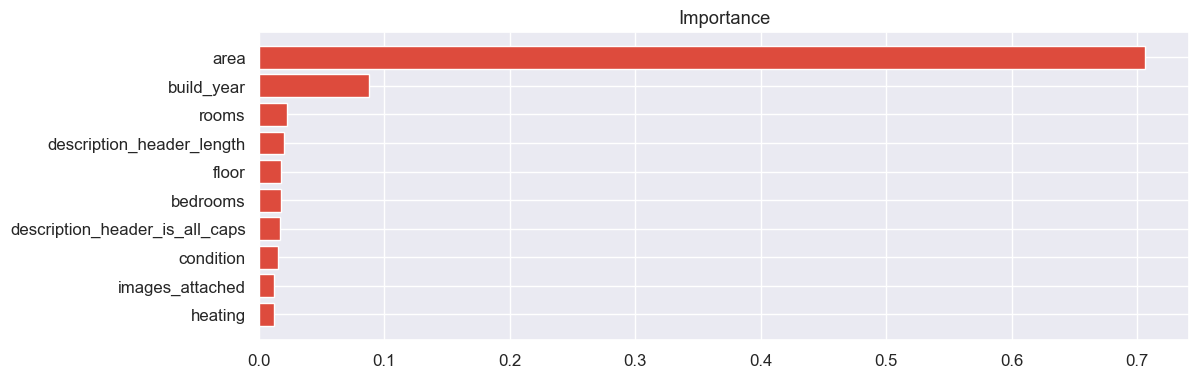

In [9]:
best_gbm_params = {
    'learning_rate': 0.05,
    'max_depth': 4,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300,
    'random_state': 42
}

#using the model that worked the best
model = GradientBoostingRegressor(**best_gbm_params)
#this is done earlier and we now use it again for hyperparameters
model.fit(X_train, y_train)


feature_importances = model.feature_importances_
#model is trained so i can extract the importance of each feature in predicting price

#Create a dataframe to show them
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color="#dd4b3d")
plt.gca().invert_yaxis()  # The most important at the top
plt.title("Importance")
#plt.xlabel("Importance")
plt.savefig('importance.pdf')

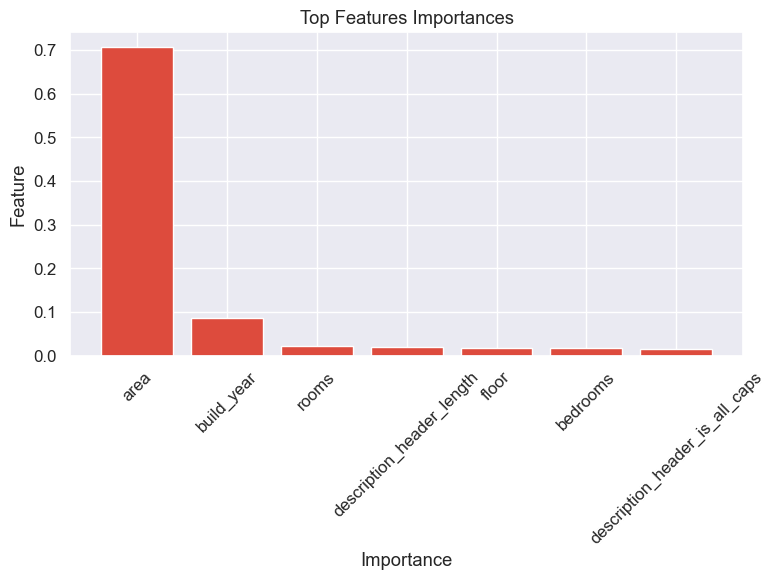

In [10]:
top_features = importance_df.head(7)
plt.figure(figsize=(8, 6))
plt.bar(top_features['Feature'], top_features['Importance'], color="#dd4b3d")
plt.title("Top Features Importances")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

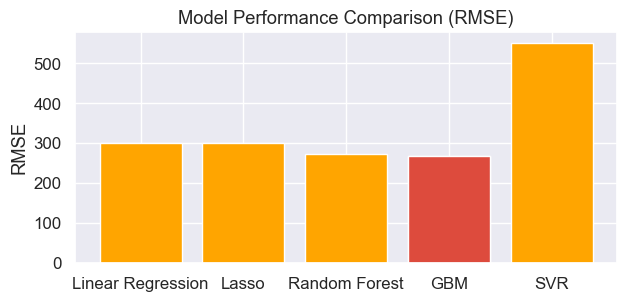

In [11]:
#doing a graph to illustrate rmse differences: 
models = ['Linear Regression', 'Lasso', 'Random Forest', 'GBM', 'SVR']
rmse_values = [299.95, 299.82, 273.54, 266.3, 550.69] #took the smallest values they got
plt.figure(figsize=(7, 3))
plt.bar(models, rmse_values, color='orange')
plt.title("Model Performance Comparison (RMSE)")
plt.ylabel("RMSE")
#plt.xlabel("Models")

# Highlight the best model
best_model_index = rmse_values.index(min(rmse_values))
plt.bar(models[best_model_index], rmse_values[best_model_index], color="#dd4b3d")

plt.savefig('performance_comparison.pdf')
